# Анализ данных в авиакомпании

## Описание данных

### База данных об авиаперевозках:
#### Таблица airports — информация об аэропортах:
* *airport_code* — трёхбуквенный код аэропорта
* *airport_name* — название аэропорта
* *city* — город
* *timezone* — временная зона

#### Таблица aircrafts — информация об самолётах:
* *aircraft_code* — код модели самолёта
* *model* — модель самолёта
* *range* — количество самолётов

#### Таблица tickets — информация о билетах:
* *ticket_no* — уникальный номер билета
* *passenger_id* — персональный идентификатор пассажира
* *passenger_name* — имя и фамилия пассажира

#### Таблица flights — информация о рейсах:
* *flight_id* — уникальный идентификатор рейса
* *departure_airport* — аэропорт вылета
* *departure_time* — дата и время вылета
* *arrival_airport* — аэропорт прилёта
* *arrival_time* — дата и время прилёта
* *aircraft_code* – id самолёта

#### Таблица ticket_flights — стыковая таблица «рейсы-билеты»
* *ticket_no* — номер билета
* *flight_id* — идентификатор рейса

#### Таблица festivals — информация о фестивалях
* *festival_id* — уникальный номер фестиваля
* *festival_date* — дата проведения фестиваля
* *festival_city* — город проведения фестиваля
* *festival_name* — название фестиваля

## Результаты запросов
/datasets/query_1.csv — результат первого запроса. В нём содержится информация о:
* *model* — модели самолета
* *flights_amount* — количество рейсов для каждой модели самолетов model в сентябре 2018 года

/datasets/query_3.csv — результат третьего запроса. В нём содержится информация о:
* *city* — городах
* *average_flights* — среднем количестве рейсов, прибывающих в город city за день в августе 2018 года

# <a name="Back"></a> Задачи исследования
[1. импортировать файлы;](#Import)  
[2. изучить данные в них;](#Study)  
[3. проверить типы данных на корректность;](#Type)  
[4. выбрать топ-10 городов по количеству рейсов;](#Top)  
[5. построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;](#Graph)  
[6. сделать выводы по каждому из графиков, пояснить результат.](#Results)

## <a name="Import"></a> Импортировать файлы

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from scipy import stats as st
from datetime import datetime

In [2]:
# настройка отображения
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
# чтение файлов
first_request = pd.read_csv('/datasets/query_1.csv')
second_request = pd.read_csv('/datasets/query_3.csv')

[К оглавлению](#Back)

## <a name="Study"></a> Изучить данные

In [4]:
# создаем список с файлами
file_list = [first_request, second_request]

# функция выводящая общую информацию по каждому файлу
def general_info(list):
    for file in file_list:
        print('-' * 100, '\n')
        display(file.info())
        display(file.describe().T)
        
        # данный блок исправляет ошибку, которая не позволяет выводит количество строк больше,
        # чем количество строк в самом дата фрейме
        if file.shape[0] > 10:
            display(file.sample(10))
        else:
            display(file.sample(file.shape[0]))
    
general_info(file_list)

---------------------------------------------------------------------------------------------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


None

,count,mean,std,min,25%,50%,75%,max
flights_amount,8.00,"2,035.62","1,965.20",300.00,605.25,795.00,"4,250.25","4,557.00"


,model,flights_amount
7,Sukhoi SuperJet-100,4185
1,Airbus A321-200,960
5,Bombardier CRJ-200,4446
0,Airbus A319-100,607
6,Cessna 208 Caravan,4557
3,Boeing 767-300,600
2,Boeing 737-300,630
4,Boeing 777-300,300


---------------------------------------------------------------------------------------------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


None

,count,mean,std,min,25%,50%,75%,max
average_flights,101.00,5.49,13.12,1.00,2.00,3.00,5.87,129.77


,city,average_flights
65,Петропавловск-Камчатский,1.00
33,Красноярск,11.58
1,Анадырь,1.00
48,Нерюнгри,2.58
90,Ухта,3.00
45,Надым,2.29
63,Пермь,10.13
13,Владикавказ,2.00
100,Ярославль,1.32
24,Йошкар-Ола,4.29


**Вывод:** данные выгружены корректно.

[К оглавлению](#Back)

## <a name="Type"></a> Проверить типы данных на корректность

**Вывод:** Типы данных корректны

## <a name="Top"></a> Выбрать топ-10 городов по количеству рейсов

In [5]:
top_ten_cities = second_request.sort_values(by='average_flights', ascending=False).head(10)
top_ten_cities

,city,average_flights
43,Москва,129.77
70,Санкт-Петербург,31.16
54,Новосибирск,17.32
33,Красноярск,11.58
20,Екатеринбург,11.32
67,Ростов-на-Дону,10.19
63,Пермь,10.13
10,Брянск,10.00
74,Сочи,9.61
84,Ульяновск,9.58


**Вывод:** наиблее посещаемый город - Москва (даже среди топ 10 городов)

## <a name="Graph"></a> Построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов

### График: модели самолетов и количество рейсов

In [6]:
model_flight = first_request.sort_values(by='flights_amount')
model_flight

,model,flights_amount
4,Boeing 777-300,300
3,Boeing 767-300,600
0,Airbus A319-100,607
2,Boeing 737-300,630
1,Airbus A321-200,960
7,Sukhoi SuperJet-100,4185
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557


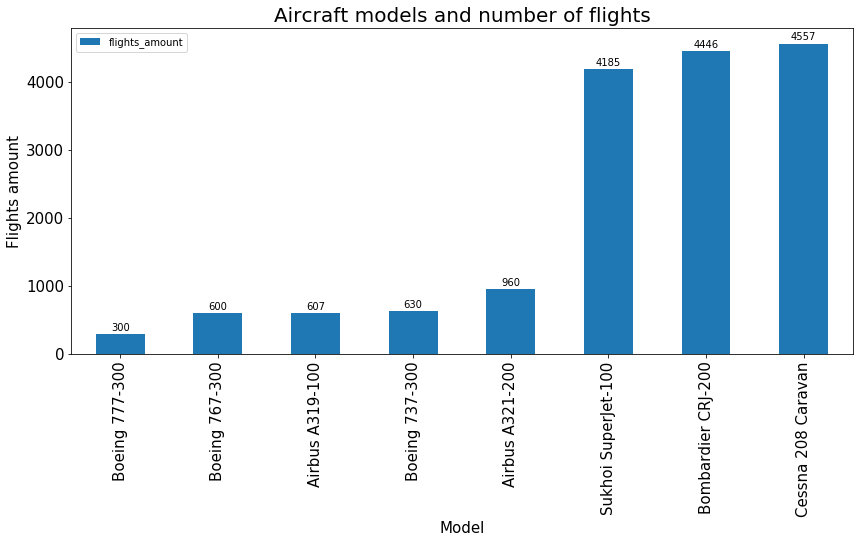

In [7]:
model_flight = first_request.sort_values(by='flights_amount')
                            
model_flight_plt = model_flight.plot(title='Aircraft models and number of flights',
                                  x='model', y='flights_amount', kind='bar', fontsize=15, legend=True, figsize=(14, 6))\
                            .title.set_size(20)
plt.xlabel('Model',fontsize=15)
plt.ylabel('Flights amount',fontsize=15)

for i, perf in enumerate(model_flight['flights_amount']):
    plt.text(i, perf + 50, str(perf), color='black', 
            ha='center')

plt.show()

### График: города и количество рейсов

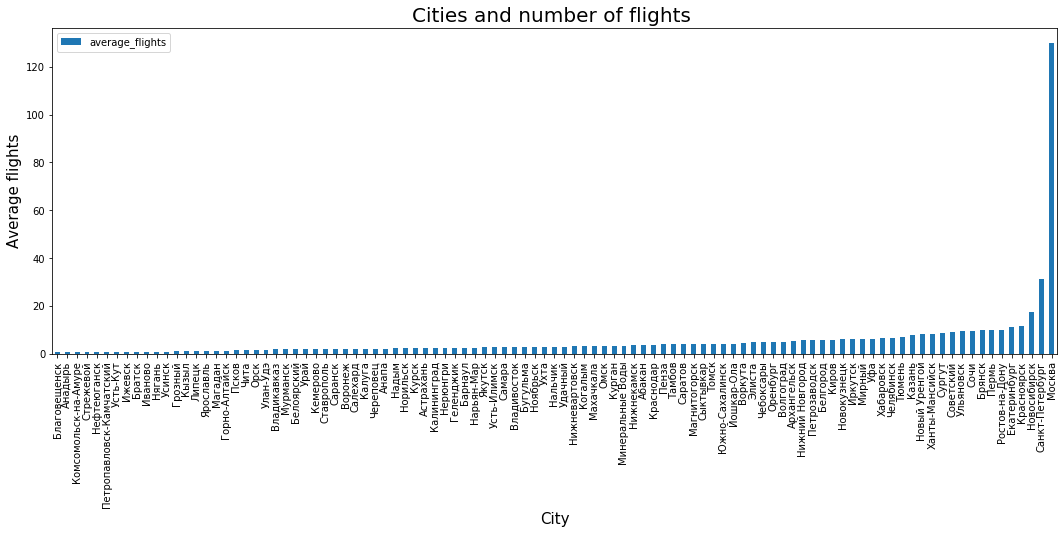

In [12]:
cities_flight = second_request.sort_values(by='average_flights')

cities_flight_plt = cities_flight.plot(title='Cities and number of flights ',
                                  x='city', y='average_flights', kind='bar', fontsize=10, legend=True, figsize=(18, 6))\
                            .title.set_size(20)

plt.xlabel('City',fontsize=15)
plt.ylabel('Average flights',fontsize=15)

plt.show()

### График: топ-10 городов и количество рейсов

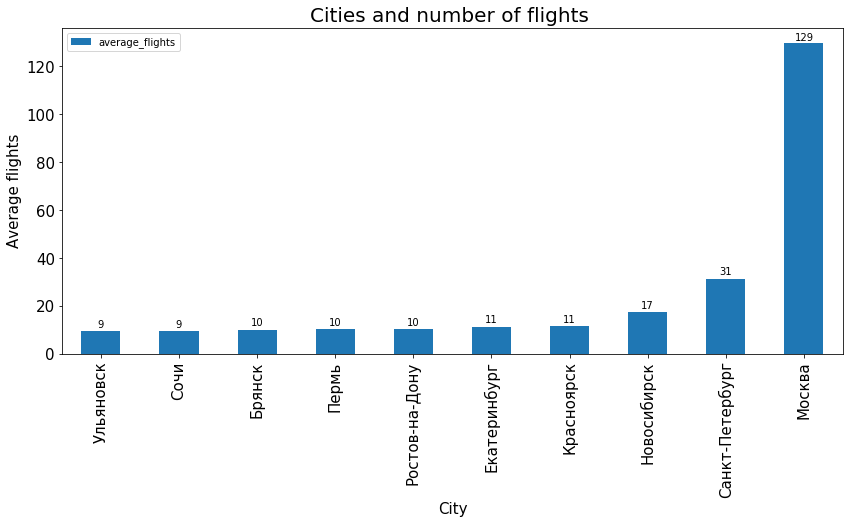

In [19]:
cities_flight = top_ten_cities.sort_values(by='average_flights')

cities_flight_plt = cities_flight.plot(title='Cities and number of flights ',
                                  x='city', y='average_flights', kind='bar', fontsize=15, legend=True, figsize=(14, 6))\
                            .title.set_size(20)

plt.xlabel('City',fontsize=15)
plt.ylabel('Average flights',fontsize=15)

for i, perf in enumerate(cities_flight['average_flights'].astype('int')):
    plt.text(i, perf + 2, str(perf), color='black', 
            ha='center')

plt.show()

## <a name="Results"></a> Выводы по каждому из графиков

1. Лидеры среди всех моделей самолетов являются: Cessna 208 Caravan, Bombardier CRJ-200, Sukhoi SuperJet-100. Популярность данных моделей обусловлена тем, что они используются на авиалиниях малой протяжённости.
2. Лидеры по количеству рейсов являются: Москва, Санкт-Петербург, Новосибирск. Москва главный воздушный транспортный узел страны, через него проходят международные, внутрение рейсы с пассажиропотоком. Через Санкт-Петербург осуществляются пассажирские и грузовые перевозки, Новосибирск главный хаб между западом и востоком.